In [1]:
# Peter Mehler

In [2]:
import networkx
import matplotlib.pyplot as plt
%matplotlib inline
import random
from pylab import *

In [3]:
def make_random_g(p):  # Generate Random Graph undirected
    n = 100
    random_graph = networkx.gnp_random_graph(n, p, seed=None, directed=False)
    return random_graph

In [4]:
def make_random_dir_g(p): # Generate Random Graph directed
    n = 100
    random_graph = networkx.gnp_random_graph(n, p, seed=None, directed=True)
    return random_graph

In [5]:
'''
n (integer) – Number of nodes in graph
alpha (float) – Probability for adding a new node connected to an existing node chosen randomly according to the in-degree distribution.
beta (float) – Probability for adding an edge between two existing nodes. One existing node is chosen randomly according the in-degree distribution 
and the other chosen randomly according to the out-degree distribution.
gamma (float) – Probability for adding a new node connected to an existing node chosen randomly according to the out-degree distribution.
delta_in (float) – Bias for choosing ndoes from in-degree distribution.
delta_out (float) – Bias for choosing ndoes from out-degree distribution.
'''
# The sum of alpha, beta, and gamma must be 1.
def make_undir_SF():  # Creates undirected Graph with Scale Free Proporties
    n = 100
    scale_free_graph = networkx.scale_free_graph(n, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, create_using=None, seed=None)
    scale_free_graph = scale_free_graph.to_undirected(as_view = True)
    return scale_free_graph

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


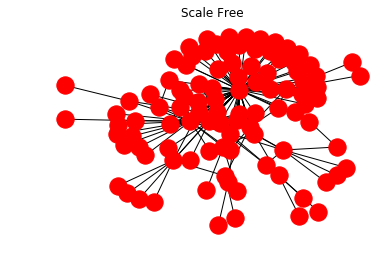

In [6]:
# visualize sample scale free graph
# Note the hub node proporties
%matplotlib inline
title("Scale Free")
networkx.draw(make_undir_SF())  

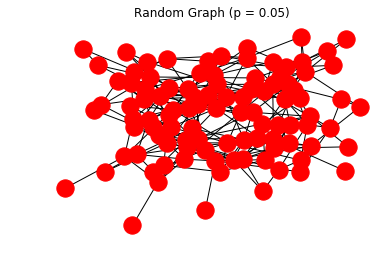

In [7]:
%matplotlib inline
title("Random Graph (p = 0.05)") # p is probability for a node to have an edge between another node
networkx.draw(make_random_g(.05))

In [8]:
def make_SF(alpha, beta, gamma):
    n=100
    scale_free_graph = networkx.scale_free_graph(n, alpha, beta, gamma, delta_in=0, delta_out=0.2, create_using=None, seed=None)
    # scale_free_graph = scale_free_graph.to_undirected(as_view = True)
    # title("Scale Free")
    # networkx.draw(scale_free_graph)
    return scale_free_graph

In [9]:
# Make graphs to be used for simulating
scale_free_graph = make_SF(0.34, 0.33, .33)  

In [10]:
random_graph = make_random_dir_g(.01)

In [11]:
scale_free_graph = make_undir_SF()

In [12]:
random_graph = make_random_g(.05)

In [13]:
def SF_in():
    scale_free_graph_in = make_SF(0.6, 0.3, .1)
    return scale_free_graph_in

In [14]:
def SF_out():
    scale_free_graph_out = make_SF(.1, 0.3, 0.6)
    return scale_free_graph_out

In [15]:
def f1(network,threshold_probability):
    ''' 
    Initially infect half of the nodes
    Potentially cure selected node
    Potentially infect healthy neighbors
    '''    
    for node in network.nodes():
        network.node[node]['infected'] = False
    
    for node in network.nodes():   # Initially infect half of the nodes
        if random.random() < 0.5:
            network.node[node]['infected'] = True
        
    result = []
    # threshold_probability = .167
    threshold_probability_cured = 1
    while len(result)<5001: # arbitrary large number (computing power restriction)
        node = random.choice(list(network.nodes()))  # randomly choose a node
        if network.node[node]['infected']:  # if infected, check neighbors and check if spread occurs
            for neighbor in network.neighbors(node):  
                if random.random() < threshold_probability:
                    network.node[neighbor]['infected'] = True
            if random.random() < threshold_probability_cured:
                # randomly cure infected node
                network.node[node]['infected'] = False
            
            result.append(len([node  for node in network.nodes() if network.node[node]['infected']]) / network.number_of_nodes())
        else:
            result.append(len([node  for node in network.nodes() if network.node[node]['infected']]) / network.number_of_nodes())

    return result

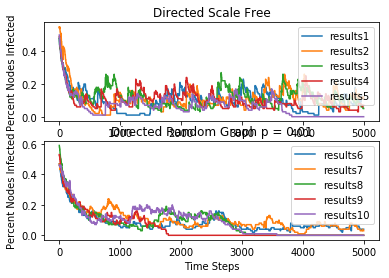

In [21]:
import random

plot1 = plt.subplot(2,1,1)

result1 = f1(scale_free_graph, .167)
result2 = f1(scale_free_graph, .167)
result3 = f1(scale_free_graph, .167)
result4 = f1(scale_free_graph, .167)
result5 = f1(scale_free_graph, .167)
title("Directed Scale Free")
xlabel("Time Steps")
ylabel("Percent Nodes Infected")
plot1.plot(result1, label='results1')
plot1.plot(result2, label='results2')
plot1.plot(result3, label='results3')
plot1.plot(result4, label='results4')
plot1.plot(result5, label='results5')
plot1.legend()

plot2 = plt.subplot(2,1,2)

result6 = f1(random_graph, .167)
result7 = f1(random_graph, .167)
result8 = f1(random_graph, .167)
result9 = f1(random_graph, .167)
result10 = f1(random_graph, .167)
title("Directed Random Graph p = 0.01")
xlabel("Time Steps")
ylabel("Percent Nodes Infected")
plot2.plot(result6, label='results6')
plot2.plot(result7, label='results7')
plot2.plot(result8, label='results8')
plot2.plot(result9, label='results9')
plot2.plot(result10, label='results10')
plot2.legend()

Using matplotlib backend: MacOSX


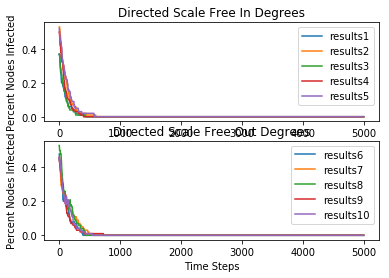

In [22]:
%matplotlib

plot3 = plt.subplot(2,1,1)

graph1 = SF_in()
graph2 = SF_in()
graph3 = SF_in()
graph4 = SF_in()
graph5 = SF_in()

result1 = f1(graph1, .167)
result2 = f1(graph2, .167)
result3 = f1(graph3, .167)
result4 = f1(graph4, .167)
result5 = f1(graph5, .167)

title("Directed Scale Free In Degrees")
xlabel("Time Steps")
ylabel("Percent Nodes Infected")

plot3.plot(result1, label='results1')
plot3.plot(result2, label='results2')
plot3.plot(result3, label='results3')
plot3.plot(result4, label='results4')
plot3.plot(result5, label='results5')
plot3.legend()

plot4 = plt.subplot(2,1,2)

graph6 = SF_out()
graph7 = SF_out()
graph8 = SF_out()
graph9 = SF_out()
graph10 = SF_out()

result6 = f1(graph6, .167)
result7 = f1(graph7, .167)
result8 = f1(graph8, .167)
result9 = f1(graph9, .167)
result10 = f1(graph10, .167)

title("Directed Scale Free Out Degrees")
xlabel("Time Steps")
ylabel("Percent Nodes Infected")

plot4.plot(result6, label='results6')
plot4.plot(result7, label='results7')
plot4.plot(result8, label='results8')
plot4.plot(result9, label='results9')
plot4.plot(result10, label='results10')
plot4.legend()

In [24]:
# Calculate average degree of random graph
count = 0
sum = 0
for degree in networkx.degree(random_graph):
    sum+=degree[1]
    count += 1

sum/count

5.38

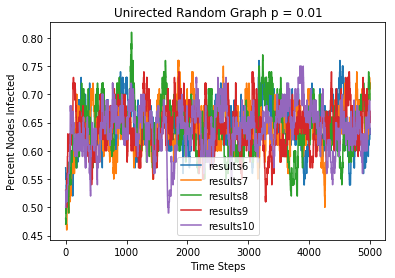

In [25]:
result6 = f1(random_graph, .5)
result7 = f1(random_graph, .5)
result8 = f1(random_graph, .5)
result9 = f1(random_graph, .5)
result10 = f1(random_graph, .5)
title("Unirected Random Graph p = 0.01")
xlabel("Time Steps")
ylabel("Percent Nodes Infected")
plt.plot(result6, label='results6')
plt.plot(result7, label='results7')
plt.plot(result8, label='results8')
plt.plot(result9, label='results9')
plt.plot(result10, label='results10')
legend()

In [26]:
def avg_inf(thresh, graph):
    result1 = f1(graph, thresh)
    result2 = f1(graph, thresh)
    result3 = f1(graph, thresh)
    result4 = f1(graph, thresh)
    result5 = f1(graph, thresh)
    
    # calculate num infected nodes at time step 5000
    r1 = result1[5000]
    r2 = result2[5000]
    r3 = result3[5000]
    r4 = result4[5000]
    r5 = result5[5000]

    return (r1+r2+r3+r4+r5)/5

In [27]:
def thresh_test(graph):
    y = [0,0,0,0,0,0]
    y[0] = avg_inf(0, graph)
    y[1] = avg_inf(.167, graph)
    y[2] = avg_inf(.2, graph)
    y[3] = avg_inf(.25, graph)
    y[4] = avg_inf(.33, graph)
    y[5] = avg_inf(.5, graph)
    return y

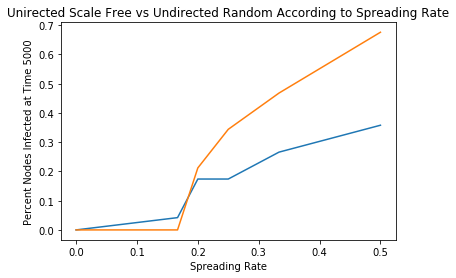

In [28]:
import random
x = [0,1/6,1/5,1/4,1/3,1/2]
sf = thresh_test(scale_free_graph)
rg = thresh_test(random_graph)
title("Unirected Scale Free vs Undirected Random According to Spreading Rate")
xlabel("Spreading Rate")
ylabel("Percent Nodes Infected at Time 5000")
plt.plot(x, sf, label ="scale free")
plt.plot(x, rg, label ="random graph")